# <h1 id="problema">Contexto analítico</h1>

Requerimos diseñar un modelo que permita determinar el precio medio de las viviendas en Boston, para ello contamos con un set de información disponible en Keras con características y precios de viviendas en diferentes ubicaciones de Boston de finales de 1970. (Mayor detalle disponible en http://lib.stat.cmu.edu/datasets/boston 

En total contamos con 506 muestras caracterizadas por 13 variables. 


 Variables | Description
 --- | ---
 CRIM   |  per capita crime rate by town
 ZN     |  proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS  |  proportion of non-retail business acres per town
 CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX    |  nitric oxides concentration (parts per 10 million)
 RM     |  average number of rooms per dwelling
 AGE    |  proportion of owner-occupied units built prior to 1940
 DIS    |  weighted distances to five Boston employment centres
 RAD    |  index of accessibility to radial highways
 TAX    |  full-value property-tax rate per \$10,000
 PTRATIO|  pupil-teacher ratio by town
 B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT  |  % lower status of the population
 MEDV   |  Median value of owner-occupied homes in $1000's


In [1]:
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [3]:
layers = [
    Dense(16, input_dim=13 , kernel_initializer='normal', activation='relu'),
    Dense(8, kernel_initializer='normal', activation='relu'),
    Dense(4, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal'),
    ]

model = Sequential(layers)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, batch_size=32, epochs=200, validation_data=(x_val, y_val))
evaluation = model.evaluate(x_test, y_test, verbose=0)
evaluation


_absolute_percentage_error: 29.7942
Epoch 99/200
363/363 [==============================] - 0s 110us/step - loss: 48.6638 - mean_absolute_percentage_error: 23.7743 - val_loss: 61.0090 - val_mean_absolute_percentage_error: 29.4338
Epoch 100/200
363/363 [==============================] - 0s 110us/step - loss: 48.4190 - mean_absolute_percentage_error: 23.3572 - val_loss: 60.6895 - val_mean_absolute_percentage_error: 28.3279
Epoch 101/200
363/363 [==============================] - 0s 99us/step - loss: 48.2079 - mean_absolute_percentage_error: 22.7246 - val_loss: 60.1491 - val_mean_absolute_percentage_error: 28.4970
Epoch 102/200
363/363 [==============================] - 0s 110us/step - loss: 48.0061 - mean_absolute_percentage_error: 22.6882 - val_loss: 59.9252 - val_mean_absolute_percentage_error: 28.3223
Epoch 103/200
363/363 [==============================] - 0s 121us/step - loss: 47.9594 - mean_absolute_percentage_error: 23.5764 - val_loss: 59.7244 - val_mean_absolute_percentage_error:

[28.370568107156192, 19.666044235229492]

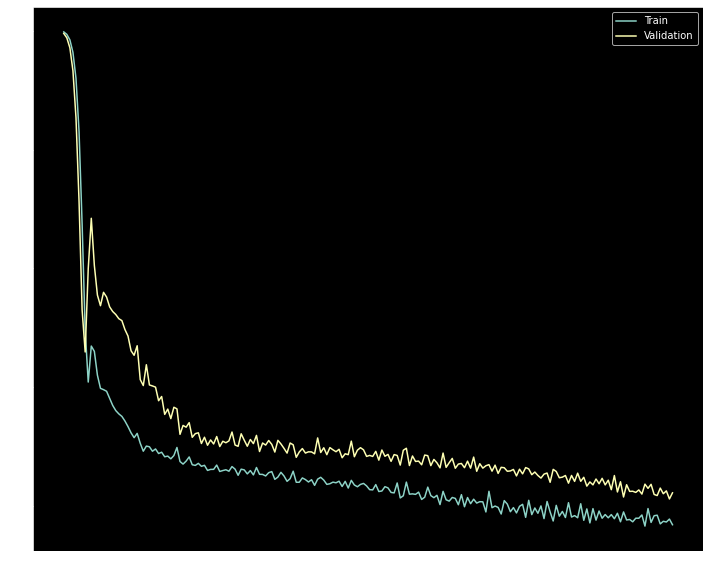

In [5]:
plt.figure(figsize=(12, 10))

plt.plot(history.history['mean_absolute_percentage_error'], label='Train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation')

plt.legend()

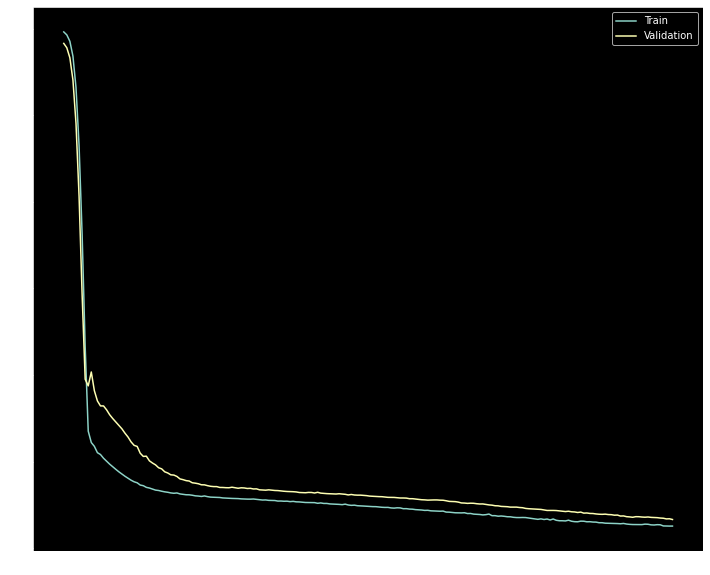

In [6]:
plt.figure(figsize=(12, 10))

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')

plt.legend()